In [23]:
%matplotlib inline

import sys
sys.path.append("../")

import numpy as np
import fbprophet
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from src import dataset

In [24]:
excel_file = "20160921-analysisofestimatedarrivals.xlsx"
df = dataset.load_excel(excel_file)


In [25]:
df_italy = df.iloc[:, 0:1] # Arrivals to Italy
df_greek_island = df.iloc[:, 1:2] # Arrivals to Greek Island
df_mainland_greece = df.iloc[:, 2:3] # Arrivals to Mainland greece
df_fyrom = df.iloc[:, 3:4] # Arrivals to fYRoM
df_serbia = df.iloc[:, 4:5] # Arrivals to Serbia
df_croatia = df.iloc[:, 5:6] # Arrivals to Croatia
df_hungry = df.iloc[:, 6:7] # Arrivals to Hungry
df_slovenia = df.iloc[:, 7:8] # Arrivals to Slovenia
df_austria = df.iloc[:, 8:9] # Arrivals to Austria

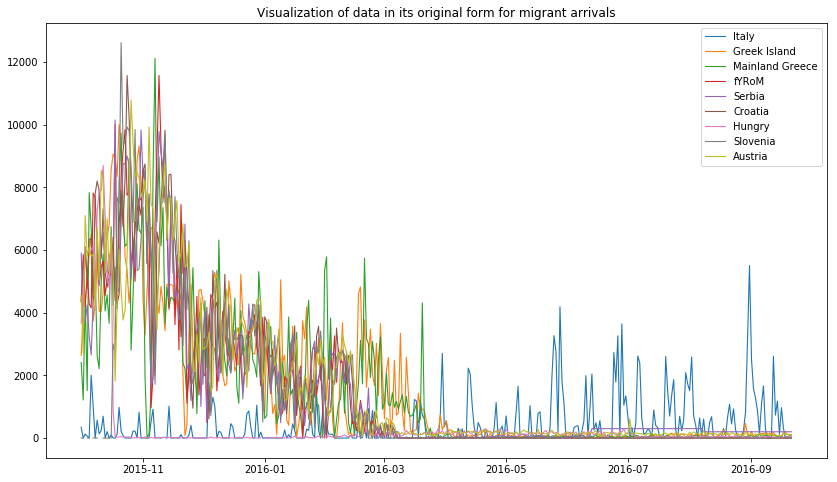

In [91]:
plt.figure(figsize=(14,8))
plt.plot(df_italy.index, df_italy.iloc[:, 0], label="Italy", linewidth=1.1)
plt.plot(df_greek_island.index, df_greek_island.iloc[:, 0], label="Greek Island", linewidth=1.1)
plt.plot(df_mainland_greece.index, df_mainland_greece.iloc[:, 0], label="Mainland Greece", linewidth=1.1)
plt.plot(df_fyrom.index, df_fyrom.iloc[:, 0], label="fYRoM", linewidth=1.1)
plt.plot(df_serbia.index, df_serbia.iloc[:, 0], label="Serbia", linewidth=1.1)
plt.plot(df_croatia.index, df_croatia.iloc[:, 0], label="Croatia", linewidth=1.1)
plt.plot(df_hungry.index, df_hungry.iloc[:, 0], label="Hungry", linewidth=1.1)
plt.plot(df_slovenia.index, df_slovenia.iloc[:, 0], label="Slovenia", linewidth=1.1)
plt.plot(df_austria.index, df_austria.iloc[:, 0], label="Austria", linewidth=1.1)
plt.legend(loc="best")
plt.title("Visualization of data in its original form for migrant arrivals")
plt.show()

In [84]:
df = df_italy # Seriies to test

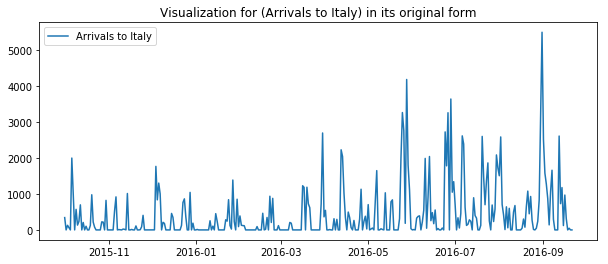

In [88]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df.iloc[:, 0], label=df.columns[0])
plt.legend(loc="best")
plt.title("Visualization for (%s) in its original form" %df.columns[0])
plt.show()

In [89]:
df.head()

,Arrivals to Italy
Date,
2015-10-01,343
2015-10-02,0
2015-10-03,128
2015-10-04,62
2015-10-05,0


In [90]:
df.head()

,Arrivals to Italy
Date,
2015-10-01,343
2015-10-02,0
2015-10-03,128
2015-10-04,62
2015-10-05,0


In [93]:
rollmean  = df.rolling(window=30).mean()
rollstd  = df.rolling(window=30).std()

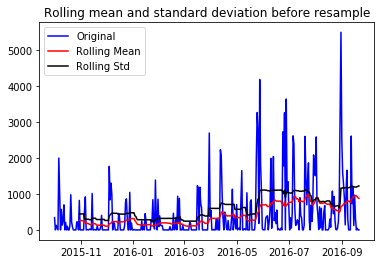

In [94]:
orig = plt.plot(df, color="blue", label="Original")
mean = plt.plot(rollmean, color="red", label="Rolling Mean")
std = plt.plot(rollstd, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling mean and standard deviation before resample")
plt.show(block=False)

In [96]:
# Resample by weeks
w_df = df.resample("W").sum()
w_df = w_df.reset_index().rename(columns={'Date': 'ds', 'Arrivals to Italy': 'y'})
w_df = w_df.set_index("ds")


In [97]:
w_df['y'] = w_df['y'].replace(to_replace=0, method='ffill')
w_df.head()

,y
ds,
2015-10-04,533
2015-10-11,3954
2015-10-18,1007
2015-10-25,1399
2015-11-01,1265


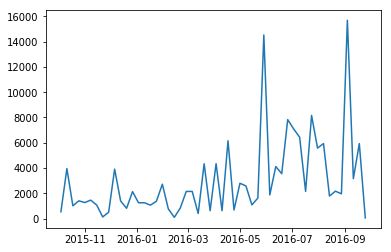

In [98]:
plt.plot(w_df.index, w_df["y"])
plt.show()

In [99]:
w_rollmean = w_df.rolling(window=7).mean()
w_rollstd = w_df.rolling(window=7).std()

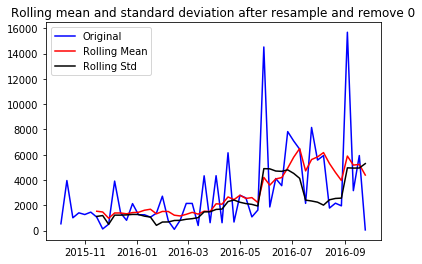

In [100]:
orig = plt.plot(w_df, color="blue", label="Original")
mean = plt.plot(w_rollmean, color="red", label="Rolling Mean")
std = plt.plot(w_rollstd, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling mean and standard deviation after resample and remove 0")
plt.show(block=False)

In [101]:
w_df.head()

,y
ds,
2015-10-04,533
2015-10-11,3954
2015-10-18,1007
2015-10-25,1399
2015-11-01,1265


In [102]:
# w_df = w_df.reset_index()
logged = np.log(w_df)
print(w_df.shape)

decomposistion = seasonal_decompose(logged, model="additive")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

(52, 1)


ValueError: operands could not be broadcast together with shapes (52,) (54,) 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


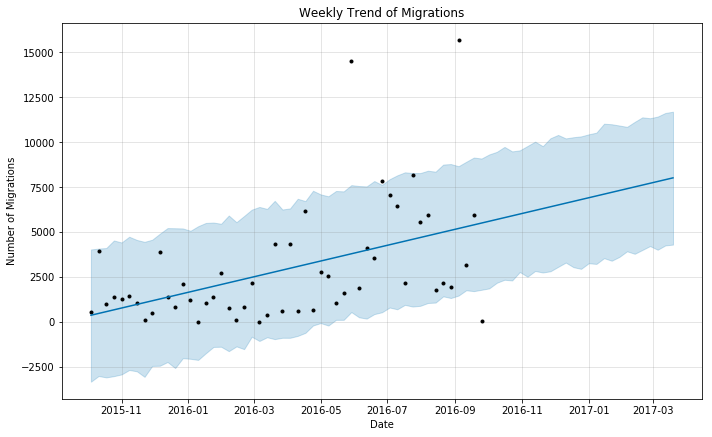

In [54]:
ph_model = fbprophet.Prophet(changepoint_prior_scale=0.14)
ph_model.fit(w_df)
ph_forecast = ph_model.make_future_dataframe(periods=25, freq='W')
ph_forecast = ph_model.predict(ph_forecast)

ph_model.plot(ph_forecast, xlabel = 'Date', ylabel = 'Number of Migrations')
plt.title('Weekly Trend of Migrations')
plt.show()